# Quantum Teleportation

In [1]:
import numpy as np
import matplotlib
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

## 1. Overview <a id='overview'></a>

<IPython.core.display.Latex object>

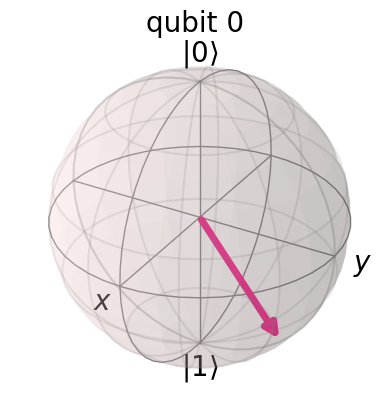

In [2]:
psi = random_statevector(2)  ## random one qubit state
display(array_to_latex(psi, prefix="|\\psi_1\\rangle =")) # display the state mathematically (not possible in reality)
plot_bloch_multivector(psi) # display the state on the Bloch sphere (not possible in reality)

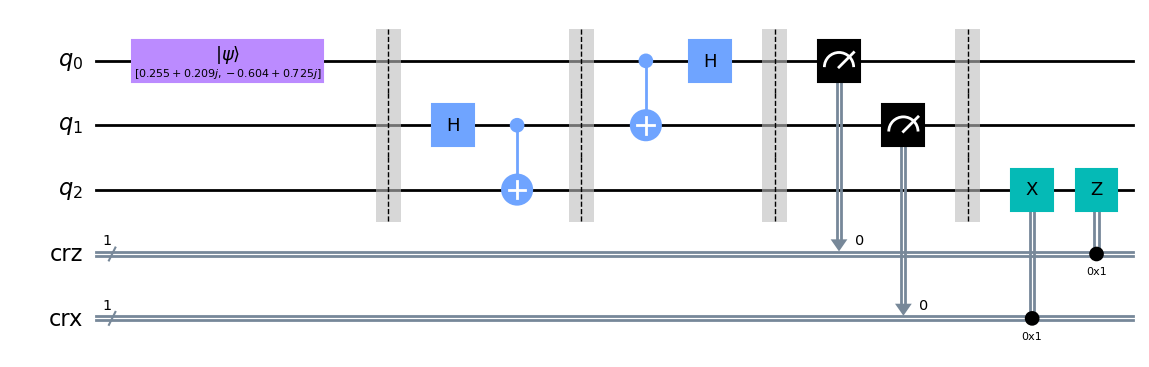

In [3]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

# Step 0: initialise q0 in state psi_1
teleportation_circuit.initialize(psi,0)
teleportation_circuit.barrier()

## STEP 1: Create Bell pair between q1 and q2 and send one to Bob and one to Alice
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)
teleportation_circuit.barrier()

## STEP 2: Alice entangles q0 with q1
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)
teleportation_circuit.barrier()

## STEP 3: Alice measures her qubits and sends the result to Bob
teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)
teleportation_circuit.barrier()

## STEP 4: Bob uses conditional Z and X gates so that qubit #3 is in the initial state of qubit #1 
teleportation_circuit.x(2).c_if(crx, 1)
teleportation_circuit.z(2).c_if(crz, 1)

teleportation_circuit.draw(output="mpl", filename="circuit")

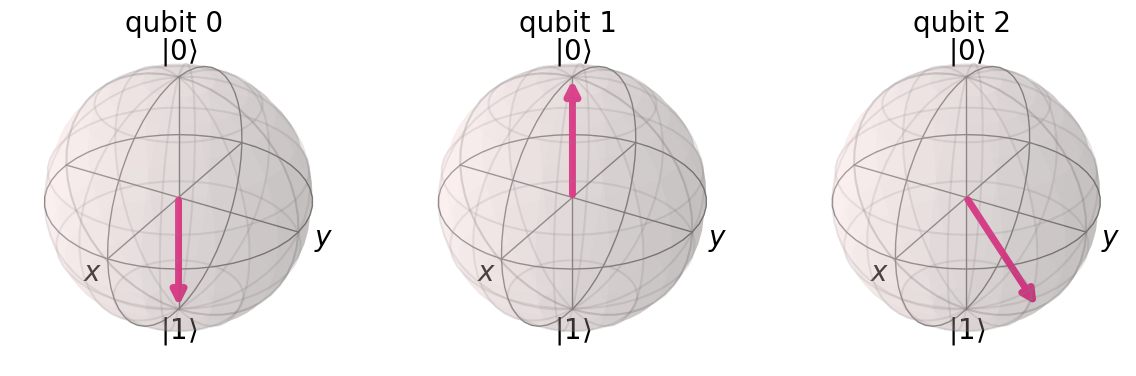

In [4]:
teleportation_circuit.save_statevector() # save final statevector
sim = Aer.get_backend('aer_simulator') # get simulator of a quantum computer from the qiskit backend
out_vector = sim.run(teleportation_circuit).result().get_statevector() # run the simulation
plot_bloch_multivector(out_vector) # plot final state of the system (only works for disentangled systems)